Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from matplotlib.ticker import FuncFormatter

Importing Dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drive/MyDrive/ML Final/train.csv')

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/ML Final/test1.csv')

In [ ]:
train.head(5)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [ ]:
train.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [ ]:
#assigning the corresponding english names
train.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [ ]:
train.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [ ]:
#check info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [ ]:
#checking unique values
print(train.nunique())

Id                         800
status                       4
duration                    31
credit_history               5
purpose                     10
amount                     754
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         52
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64


In [ ]:
#Check for null values
train.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Outliers in column 'duration': [ 8 11 11 11 11 42 33  4 47 27 14 39  4 39  5 11 54 11 27 60 42 42 28 11
 11 39  7 27 27 20 14 60 20 27  4  4  4  7  4 11 33 14 20  8 42 20 42  7
  8  8  7  8 20 60 60 45 42 60 42 60 20 28 60 33 42 72 60 39 60 27 60 42
 60 27 20 54 14]


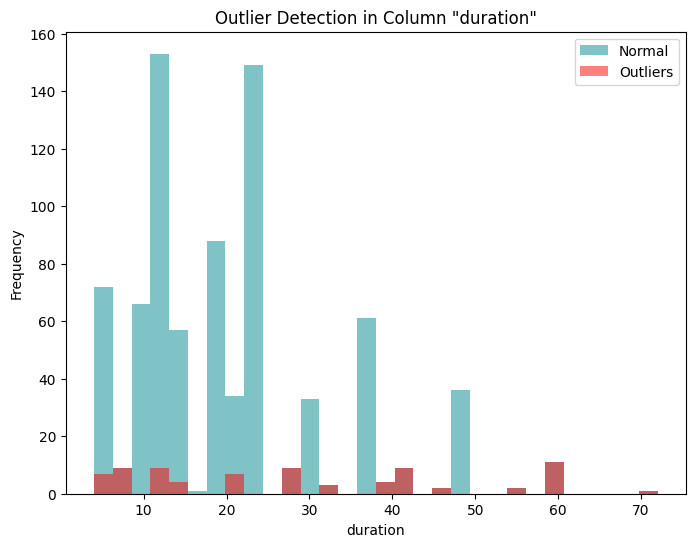

Outliers in column 'amount': [ 7582   385 10875   428   409  8858   392 12749  8072  8487  7721 12169
 10722  8613  8588  7678  8133   339  9436   250  7758   343 13756   276
   458   522 11760  7814  9566  8358  9857   362 10222  9055 12204 10623
  9277  7882 15857   368   484 10144   454 15653  8471  8947 11054  9157
  9283  7596 10974  7865  8229  7685 14555  8386   433 15672 10961 11938
 14782 12612  9398   433  7763  9034 14027  9629 12976 14421 10127 12389
 15945  8648   448 11998 18424  8978 12579 12680]


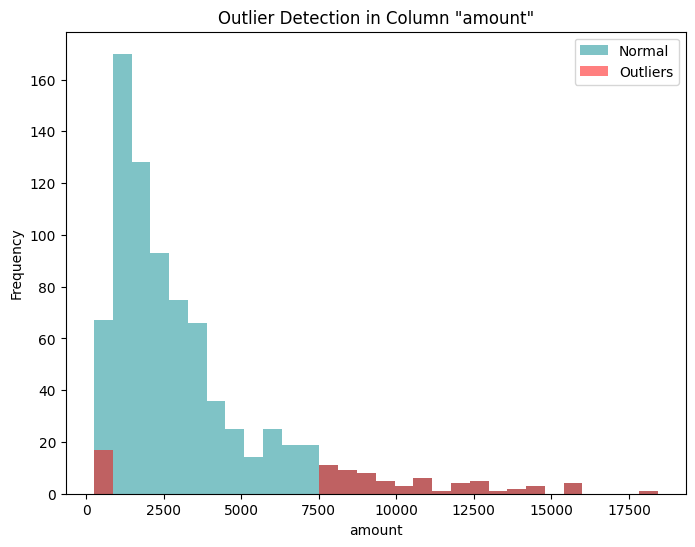

Outliers in column 'age': [21 65 56 58 61 58 63 60 58 60 63 59 61 64 74 74 64 74 20 20 19 65 63 63
 59 61 57 63 66 64 57 68 57 21 66 70 60 57 67 56 20 20 20 21 66 75 63 64
 20 21 21 57 67 20 65 21 61 63 21 66 58 60 61 61 63 19 60 21 57 20 57 61
 58 20 20]


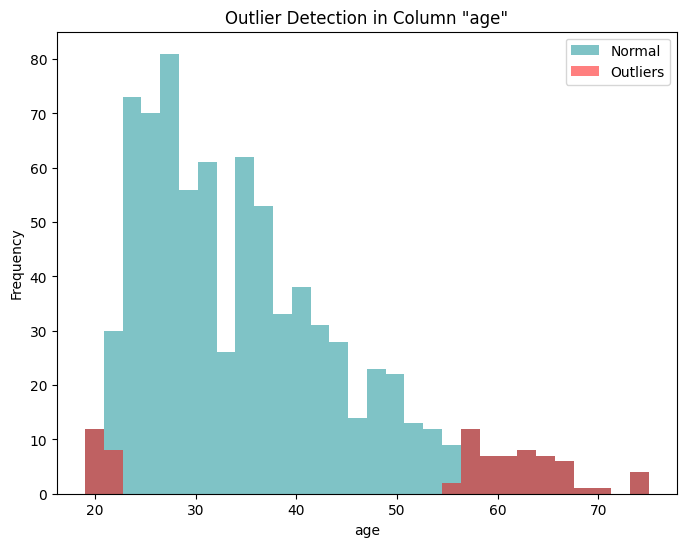

Number of outliers in each numerical column:
Column 'duration': 77 outliers
Column 'amount': 80 outliers
Column 'age': 75 outliers


In [ ]:
#detecting outliers
numerical_columns=['duration','amount','age']

# Dictionary to store the number of outliers in each numerical column
outliers_count = {}

# Perform outlier detection for each numerical column
for col in numerical_columns:
    # Extract the column values as a numpy array
    column_values = train[col].values.reshape(-1, 1)

    # Fit the Isolation Forest model
    clf = IsolationForest(contamination=0.1, random_state=42)
    clf.fit(column_values)

    # Predict outliers
    outliers = clf.predict(column_values)

    # Identify and print the outliers
    outlier_indices = np.where(outliers == -1)[0]
    outlier_values = column_values[outlier_indices].flatten()
    print(f"Outliers in column '{col}': {outlier_values}")

    # Visualize the outliers
    plt.figure(figsize=(8, 6))
    plt.hist(column_values, bins=30, alpha=0.5, color='#01888F', label='Normal')
    plt.hist(outlier_values, bins=30, alpha=0.5, color='#FF0000', label='Outliers')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Outlier Detection in Column "{col}"')
    plt.legend()
    plt.show()

    # Count the number of outliers
    num_outliers = np.sum(outliers == -1)
    outliers_count[col] = num_outliers

# Print the number of outliers in each numerical column
print("Number of outliers in each numerical column:")
for col, count in outliers_count.items():
    print(f"Column '{col}': {count} outliers")



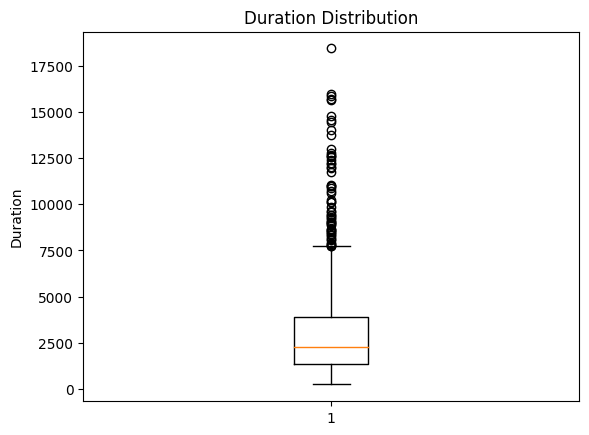

In [ ]:
plt.boxplot(train['amount'])
plt.title('Duration Distribution')
plt.ylabel('Duration')
plt.show()

In [ ]:
#Recoding Age variable to categorical
interval=(18,25,35,60,100)
categories= ['Student','Young','Adult','Senior']
train['age_label']= pd.cut(train.age,interval,labels=categories)


In [ ]:
train.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_label
0,0,1,18,4,2,1049,1,2,4,2,...,21,3,1,1,3,2,1,2,1,Student
1,1,1,9,4,0,2799,1,3,2,3,...,36,3,1,2,3,1,1,2,1,Adult
2,2,2,12,2,9,841,2,4,2,2,...,23,3,1,1,2,2,1,2,1,Student
3,3,1,12,4,0,2122,1,3,3,3,...,39,3,1,2,2,1,1,1,1,Adult
4,5,1,10,4,0,2241,1,2,1,3,...,48,3,1,2,2,1,1,1,1,Adult


In [ ]:
# drop the Id column as it is not useful for the model
train.drop(['Id'],inplace=True,axis=1)

Recoding Amount,Duration and Age

<ipython-input-19-85ec98b0693b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_duration, bins=20, color='blue')  # Specify color as 'blue'


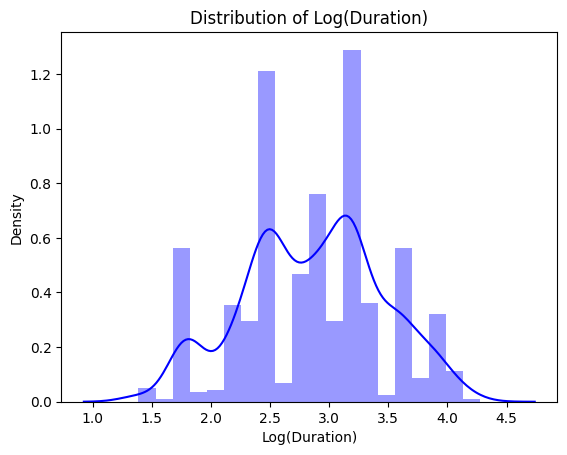

In [ ]:
log_duration = np.log(train['duration'])
sns.distplot(log_duration, bins=20, color='blue')  # Specify color as 'blue'
plt.title('Distribution of Log(Duration)')
plt.xlabel('Log(Duration)')
plt.ylabel('Density')
plt.show()
train['duration']=log_duration

<ipython-input-20-10744a10897c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'


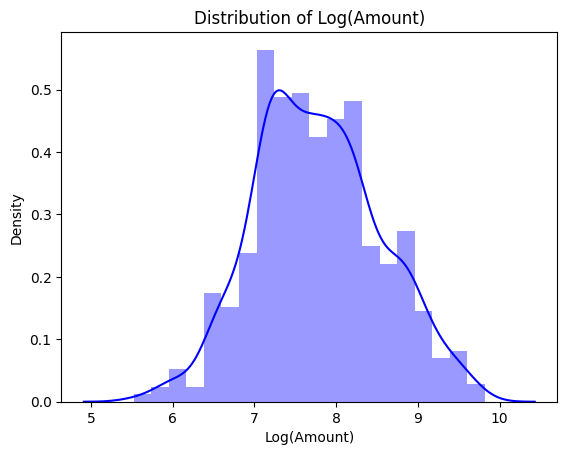

In [ ]:
log_amount = np.log(train['amount'])
sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.ylabel('Density')
plt.show()
train['amount']=log_amount

<ipython-input-21-24c59d0f3384>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'


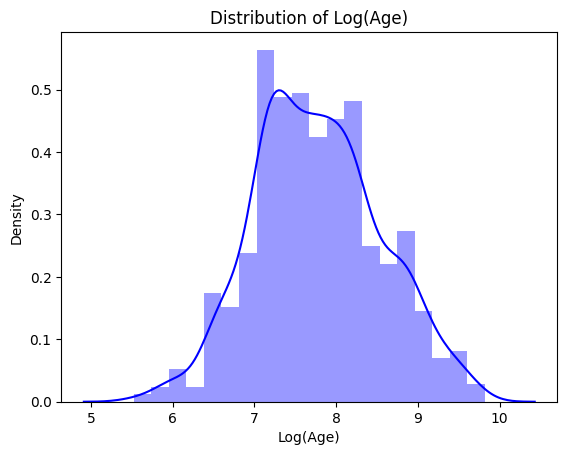

In [ ]:
log_age = np.log(train['age'])
sns.distplot(log_amount, bins=20, color='blue')  # Specify color as 'blue'
plt.title('Distribution of Log(Age)')
plt.xlabel('Log(Age)')
plt.ylabel('Density')
plt.show()
train['age']=log_age

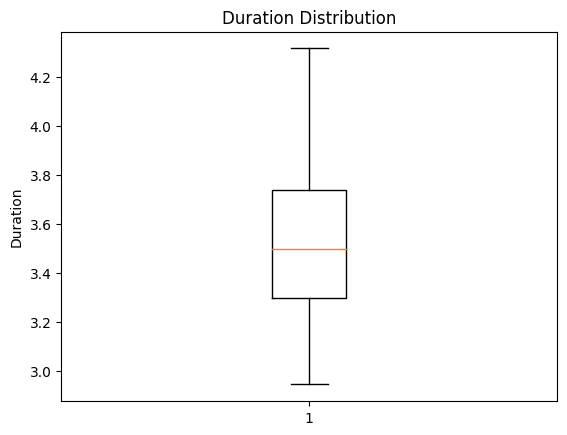

In [ ]:
plt.boxplot(train['age'])
plt.title('Duration Distribution')
plt.ylabel('Duration')
plt.show()

 **Descrptive Analysis**

<ipython-input-23-8dd0e33942ac>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)


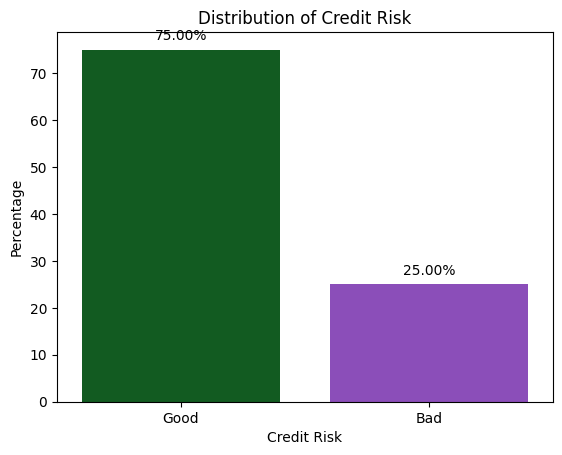

In [ ]:
#defining a color palette
custom_palette = sns.color_palette(["#06671A", "#8E3CCB"])

train['credit_risk_label'] = train['credit_risk'].map({0: 'Bad', 1: 'Good'})

# Calculate percentage of each category
percentage_data = train['credit_risk_label'].value_counts(normalize=True) * 100

# Plotting the bar plot with custom palette
ax = sns.barplot(x=percentage_data.index, y=percentage_data.values, palette=custom_palette)
plt.xlabel('Credit Risk')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Risk')
# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

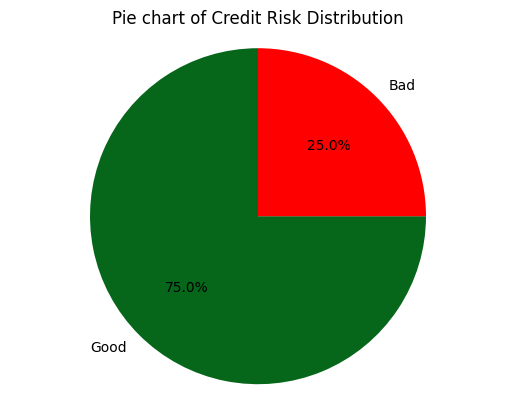

In [ ]:
#pie chart for credit risk
category_counts=train['credit_risk_label'].value_counts()
colors=["#06671A","#FF0000"]
plt.pie(category_counts,labels=category_counts.index,colors=colors,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.title('Pie chart of Credit Risk Distribution')
plt.show()

**Distribution of foreign worker**

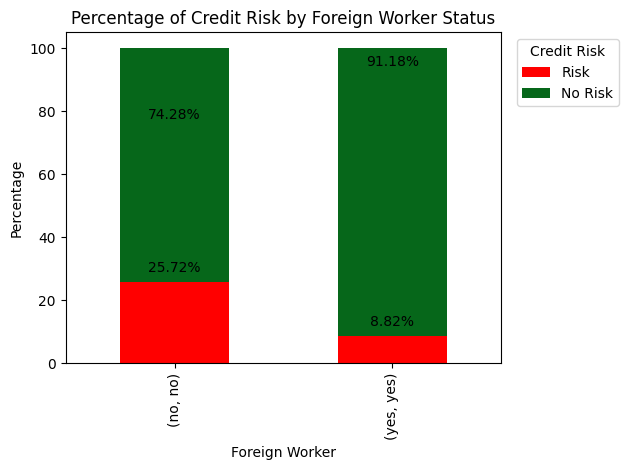

In [ ]:
train['foreign_worker_label'] = train['foreign_worker'].map({1: 'yes', 2: 'no'})

# Calculate percentage of each category for each credit risk type
percentage_data = train.groupby(['foreign_worker_label', 'credit_risk']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

# Plotting the bar plot with custom palette
ax = percentage_data.plot(kind='bar', stacked=True, color=["#FF0000","#06671A"])
plt.xlabel('Foreign Worker')
plt.ylabel('Percentage')
plt.title('Percentage of Credit Risk by Foreign Worker Status')

# Adding percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding legend to the top right
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'], bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

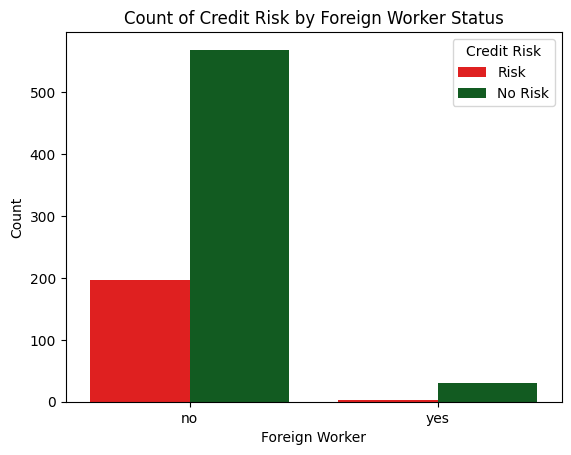

In [ ]:
train['foreign_worker_label'] = train['foreign_worker'].map({1: 'yes', 2: 'no'})
custom_palette = sns.color_palette(["#FF0000","#06671A"])

# Creating the count plot
sns.countplot(x='foreign_worker_label', hue='credit_risk', data=train,palette=custom_palette)
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.title('Count of Credit Risk by Foreign Worker Status')
plt.legend(title='Credit Risk', labels=['Risk', 'No Risk'])
plt.show()

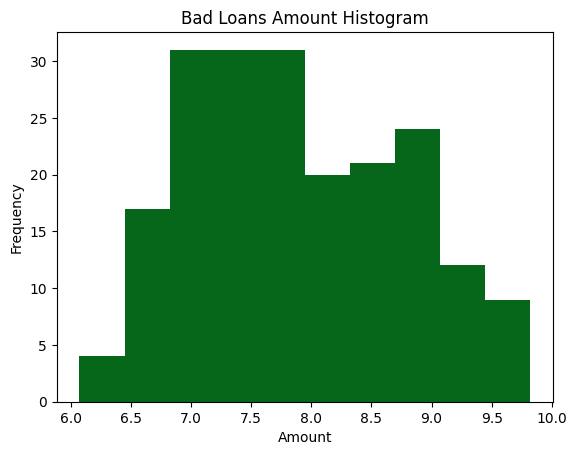

In [ ]:
plt.hist(train[train['credit_risk'] == 0]['amount'], color='#06671A')  # Specify color as 'red'
plt.title('Bad Loans Amount Histogram')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


<ipython-input-28-20812f8612f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='age_label',y='amount',data=train,palette=custom_palette)
<ipython-input-28-20812f8612f8>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='age_label',y='amount',data=train,palette=custom_palette)


Text(0.5, 1.0, 'Box Plot of Amount by Age Group')

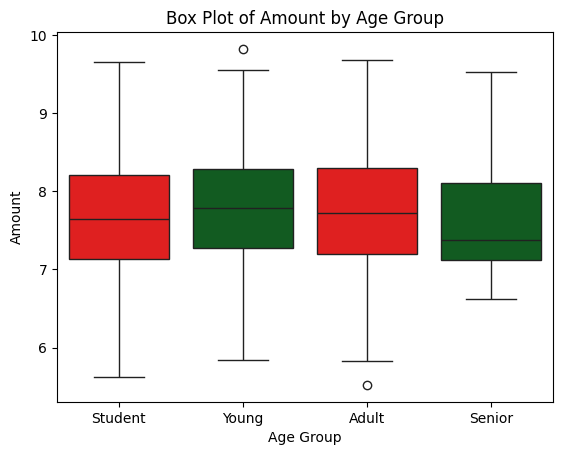

In [ ]:
#box plot for age vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='age_label',y='amount',data=train,palette=custom_palette)
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Age Group')

<ipython-input-29-00730d460f3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)
<ipython-input-29-00730d460f3e>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)


([<matplotlib.axis.XTick at 0x7ca5d77dde70>,
 [Text(0, 0, 'divorced male'),
  Text(1, 0, 'non-single female or single male'),
  Text(2, 0, 'married or widowed male'),
  Text(3, 0, 'single female')])

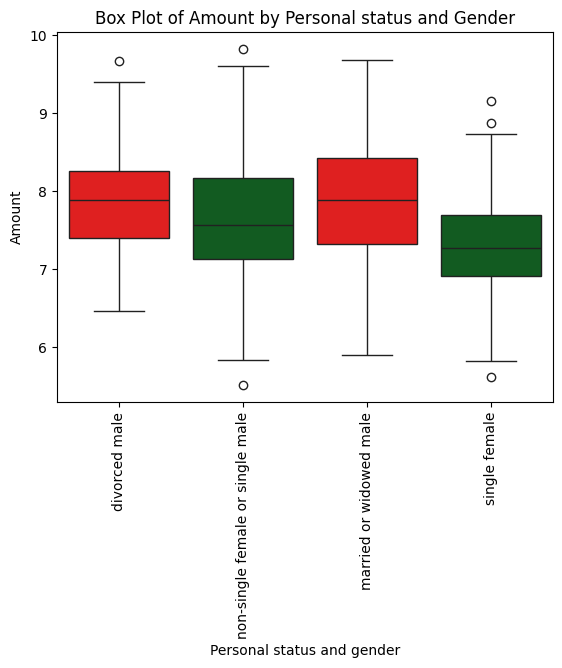

In [ ]:
#box plot for personal status vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='personal_status_sex',y='amount',data=train,palette=custom_palette)
plt.xlabel('Personal status and gender')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Personal status and Gender')
custom_labels=['divorced male', 'non-single female or single male', 'married or widowed male', 'single female']
plt.xticks(ticks=[0,1,2,3],labels=custom_labels, rotation=90)

<ipython-input-30-599c484c1743>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)
<ipython-input-30-599c484c1743>:3: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)


([<matplotlib.axis.XTick at 0x7ca5d768dff0>,
 [Text(0, 0, 'unemployed non resident'),
  Text(1, 0, 'unemployed resident'),
  Text(2, 0, 'skilled employee'),
  Text(3, 0, 'highly qualified employee')])

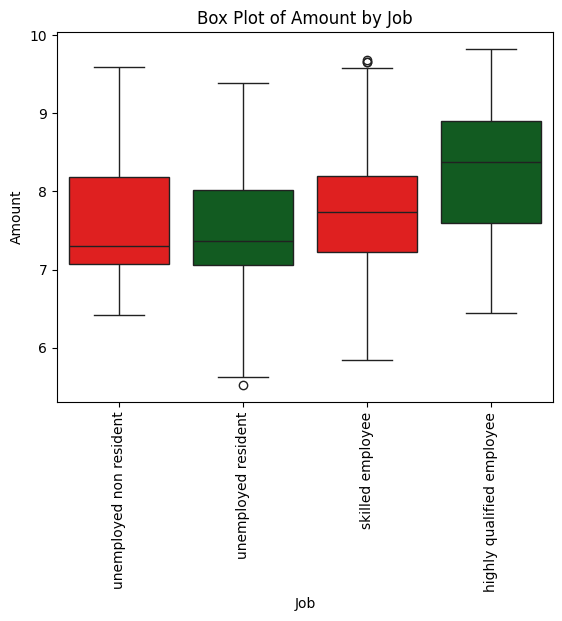

In [ ]:
#box plot for job vs amount
custom_palette = sns.color_palette(["#FF0000","#06671A"])
sns.boxplot(x='job',y='amount',data=train,palette=custom_palette)
plt.xlabel('Job')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Job')
custom_labels=['unemployed non resident','unemployed resident','skilled employee','highly qualified employee']
plt.xticks(ticks=[0,1,2,3],labels=custom_labels, rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '0.00'),
  Text(1, 0, '1.00'),
  Text(2, 0, '2.00'),
  Text(3, 0, '3.00'),
  Text(4, 0, '4.00'),
  Text(5, 0, '5.00'),
  Text(6, 0, '6.00'),
  Text(7, 0, '7.00'),
  Text(8, 0, '8.00'),
  Text(9, 0, '9.00'),
  Text(10, 0, '10.00'),
  Text(11, 0, '11.00'),
  Text(12, 0, '12.00'),
  Text(13, 0, '13.00'),
  Text(14, 0, '14.00'),
  Text(15, 0, '15.00'),
  Text(16, 0, '16.00'),
  Text(17, 0, '17.00'),
  Text(18, 0, '18.00'),
  Text(19, 0, '19.00'),
  Text(20, 0, '20.00'),
  Text(21, 0, '21.00'),
  Text(22, 0, '22.00'),
  Text(23, 0, '23.00'),
  Text(24, 0, '24.00'),
  Text(25, 0, '25.00'),
  Text(26, 0, '26.00'),
  Text(27, 0, '27.00'),
  Text(28, 0, '28.00'),
  Text(29, 0, '29.00'),
  Text(30, 0, '30.00')])

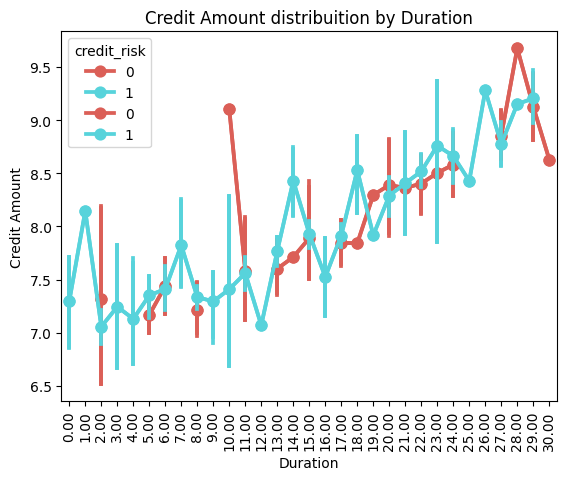

In [ ]:
ax = sns.pointplot(x="duration", y="amount", data=train, hue="credit_risk", palette="hls")

# Define a function to format x-axis labels
def format_xaxis_labels(x, pos):
    return '{:.2f}'.format(x)
ax.xaxis.set_major_formatter(FuncFormatter(format_xaxis_labels))
sns.pointplot(x="duration", y ="amount",data=train,
                   hue="credit_risk", palette="hls")
plt.xlabel("Duration")
plt.ylabel("Credit Amount")
plt.title("Credit Amount distribuition by Duration")
plt.xticks(rotation=90)

In [ ]:
# check the good and bad loan risk
train['credit_risk'].value_counts()

credit_risk
1    600
0    200
Name: count, dtype: int64

The dataset is unbalanced

In [ ]:
train.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_label,credit_risk_label
0,1,2.890372,4,2,6.955593,1,2,4,2,1,...,3,1,1,3,2,1,2,1,Student,Good
1,1,2.197225,4,0,7.937017,1,3,2,3,1,...,3,1,2,3,1,1,2,1,Adult,Good
2,2,2.484907,2,9,6.734592,2,4,2,2,1,...,3,1,1,2,2,1,2,1,Student,Good
3,1,2.484907,4,0,7.660114,1,3,3,3,1,...,3,1,2,2,1,1,1,1,Adult,Good
4,1,2.302585,4,0,7.714677,1,2,1,3,1,...,3,1,2,2,1,1,1,1,Adult,Good


Correlation of Numerical Variables

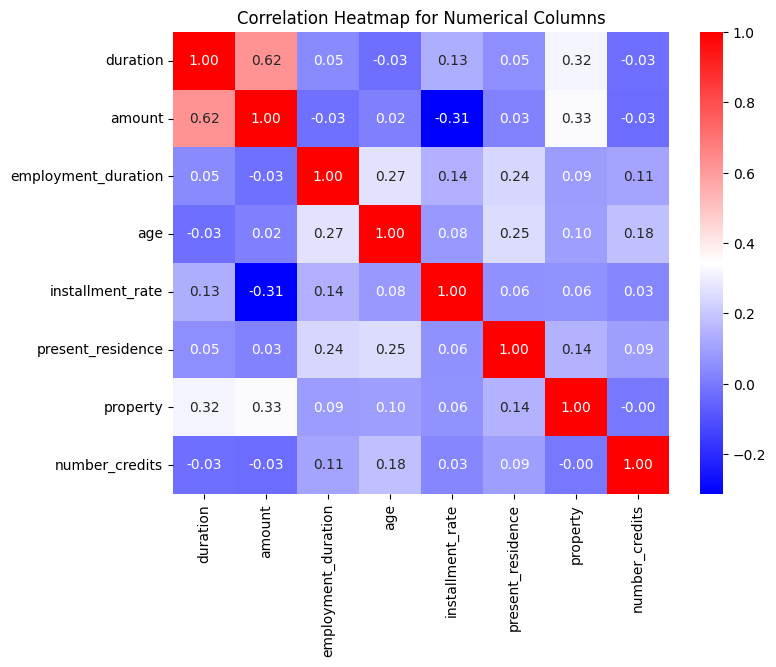

In [ ]:
num_variables=['duration','amount','employment_duration','age','installment_rate','present_residence','property','number_credits']
corr_matrix=train[num_variables].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='bwr', fmt=".2f")
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

Correlation between categorical variables

In [ ]:
categorical_columns=['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']

from scipy.stats import chi2_contingency

def perform_chi_square_test(df,col1,col2):
  contingency_table = pd.crosstab(df[col1], df[col2])
  chi2, p, dof, _ = chi2_contingency(contingency_table)
  return chi2, p, dof

results = []
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i + 1:]:  # Avoid repeating pairs
        chi2, p, dof = perform_chi_square_test(train, col1, col2)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2 Statistic': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

# Convert the results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display or further process the results
print(results_df)

                 Variable 1               Variable 2  Chi2 Statistic  \
0                    status           credit_history       52.740014   
1                    status                  purpose       56.120858   
2                    status                  savings       63.991981   
3                    status      personal_status_sex       18.600172   
4                    status            other_debtors       23.727486   
5                    status  other_installment_plans        5.773083   
6                    status                  housing       19.961402   
7            credit_history                  purpose       80.443836   
8            credit_history                  savings       20.582659   
9            credit_history      personal_status_sex       20.465539   
10           credit_history            other_debtors       11.189928   
11           credit_history  other_installment_plans      116.702468   
12           credit_history                  housing       12.52

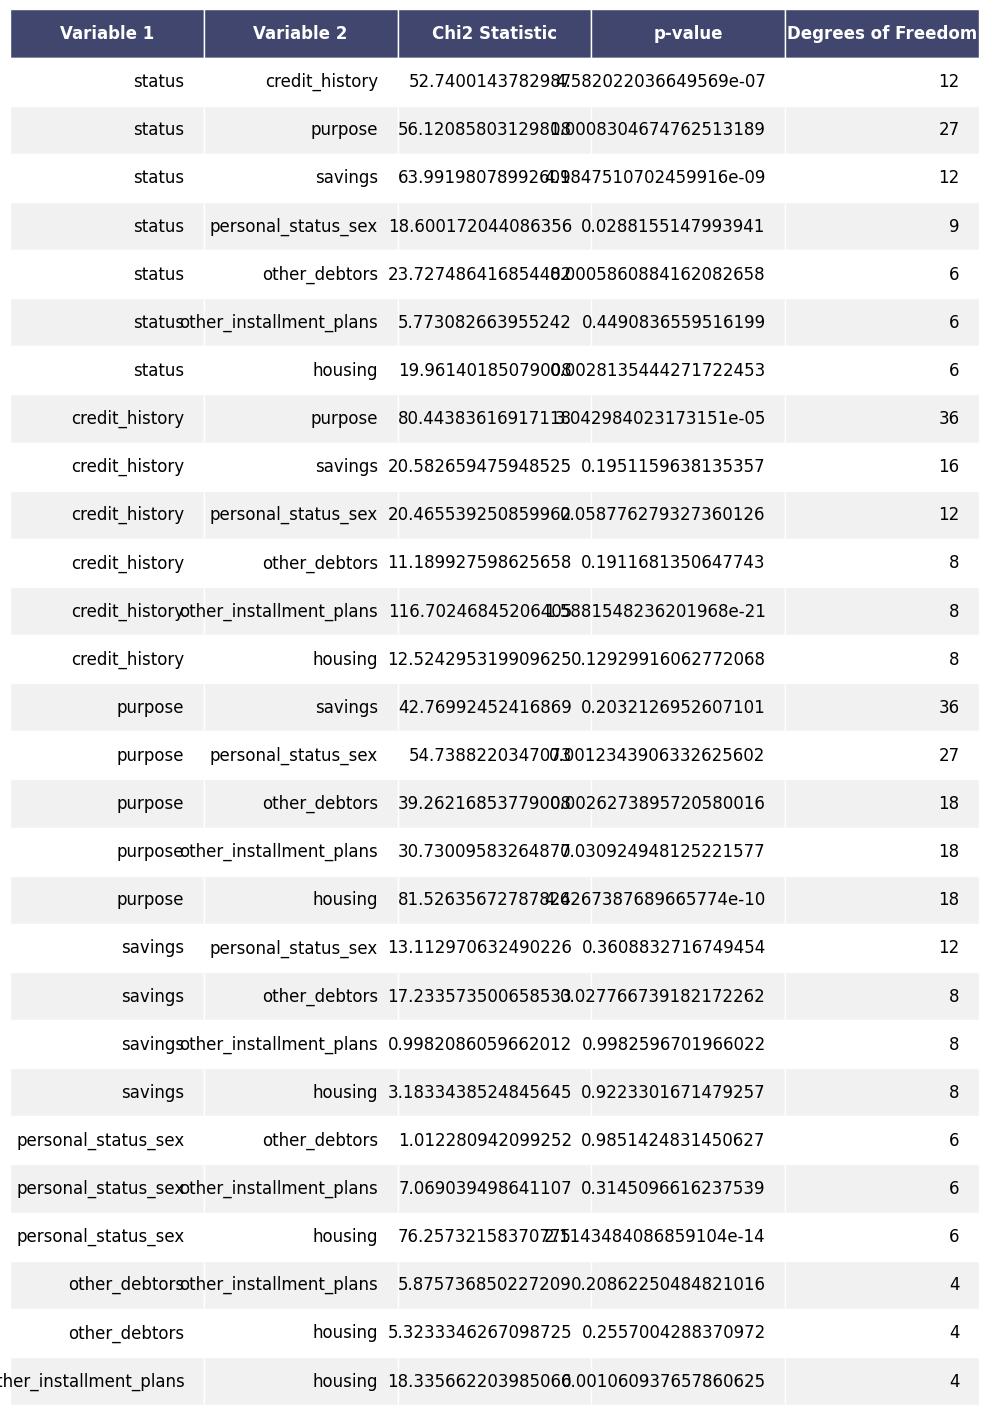

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming results_df is already defined as shown in your script

# Function to render the DataFrame as a table using matplotlib
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,
                     header_color='#40466e', row_colors=['#f1f1f2', '#ffffff'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0] % len(row_colors)])
    return ax

# Plot the table
render_mpl_table(results_df, header_columns=0, col_width=2.5)
plt.show()


In [ ]:
import pandas as pd

# Assuming results_df is already populated with the chi-square results as described

# Filter the DataFrame for significant results based on a p-value threshold
significant_results = results_df[results_df['p-value'] < 0.05]

# Display the significant results
print(significant_results)

# Optional: save the significant pairs to a CSV file for further analysis or reporting
significant_results.to_csv('significant_chi_square_results.csv', index=False)


                 Variable 1               Variable 2  Chi2 Statistic  \
0                    status           credit_history       52.740014   
1                    status                  purpose       56.120858   
2                    status                  savings       63.991981   
3                    status      personal_status_sex       18.600172   
4                    status            other_debtors       23.727486   
6                    status                  housing       19.961402   
7            credit_history                  purpose       80.443836   
11           credit_history  other_installment_plans      116.702468   
14                  purpose      personal_status_sex       54.738822   
15                  purpose            other_debtors       39.262169   
16                  purpose  other_installment_plans       30.730096   
17                  purpose                  housing       81.526357   
19                  savings            other_debtors       17.23

<ipython-input-35-1d183eaf5194>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.fillna(0, inplace=True)  # Replace NaNs with 0 for simplicity, you might want to use a more sophisticated approach
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 t

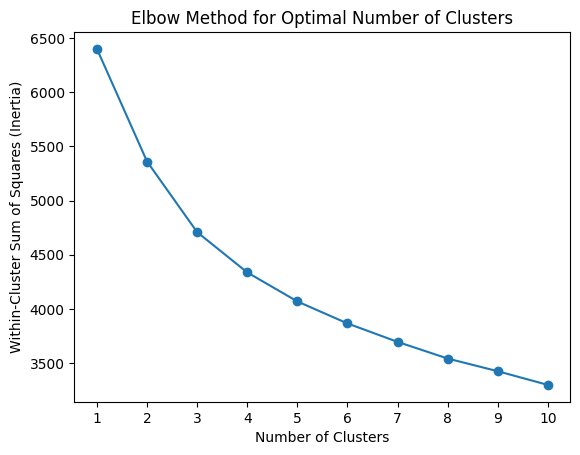

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Extract numeric data
numeric_data = train[num_variables]

# Handle missing values if any
numeric_data.fillna(0, inplace=True)  # Replace NaNs with 0 for simplicity, you might want to use a more sophisticated approach

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Initialize lists to store inertia values for different numbers of clusters
inertia_values = []

# Define a range of clusters to try
cluster_range = range(1, 11)  # Adjust as needed

# Fit KMeans clustering for each number of clusters and calculate inertia
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


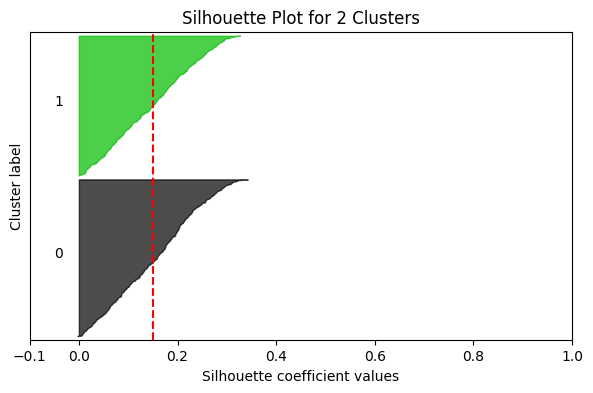

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


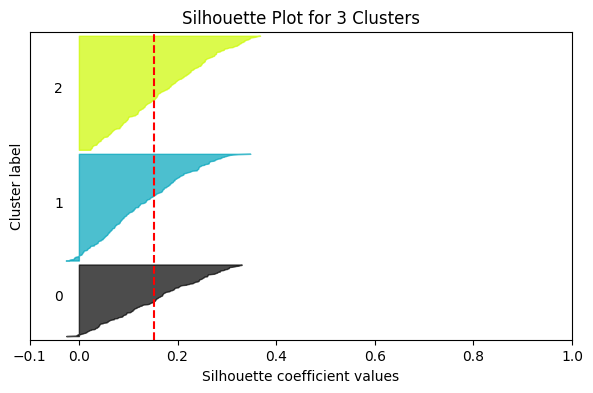

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


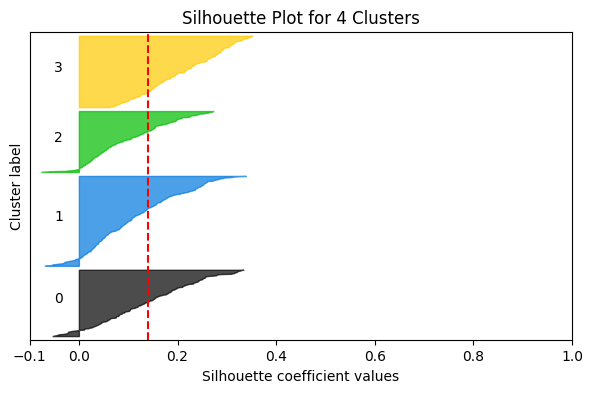

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


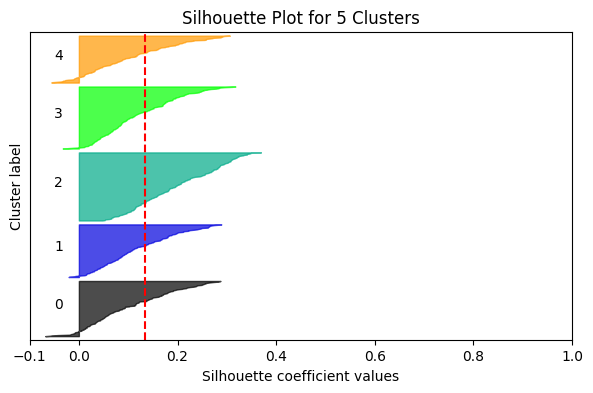

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


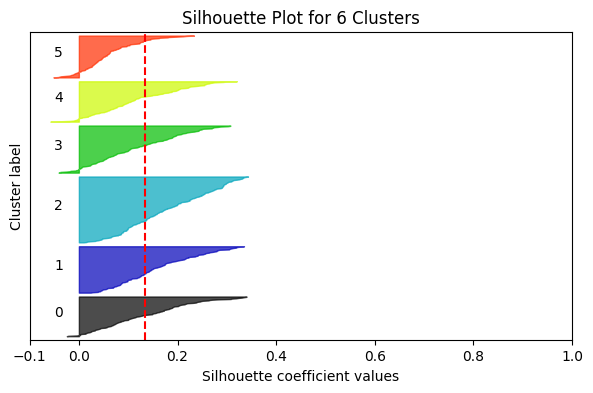

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


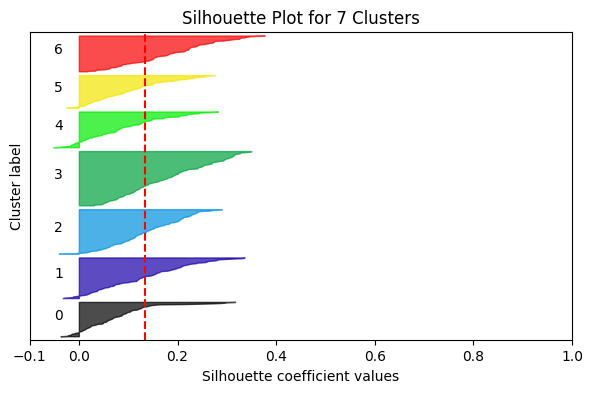

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


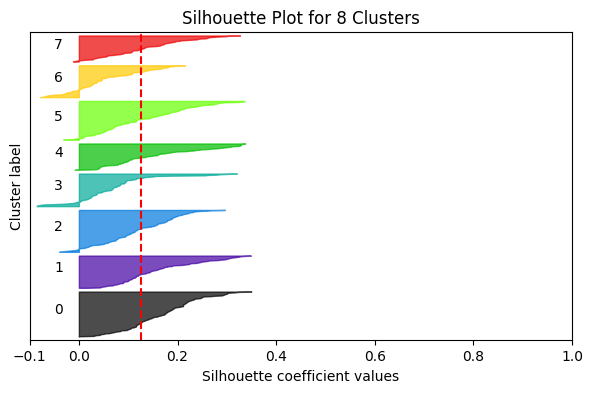

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


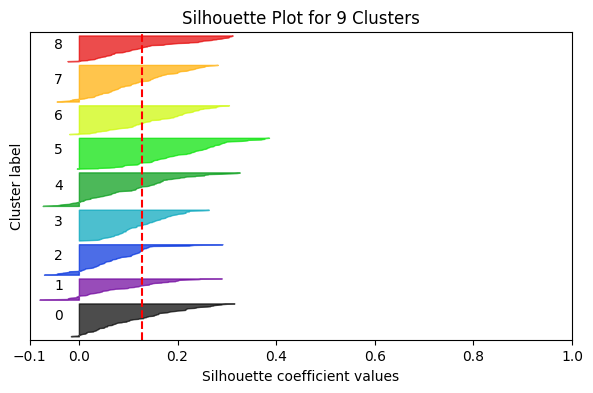

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


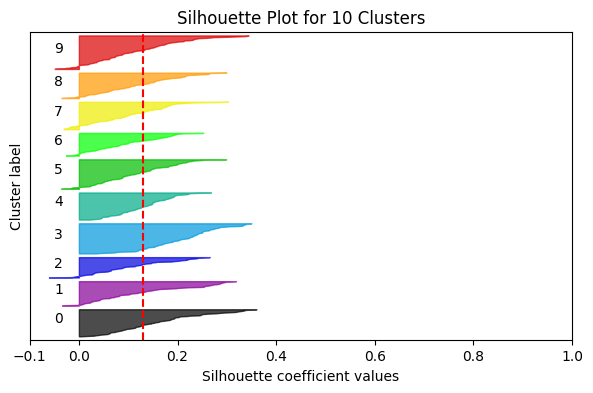

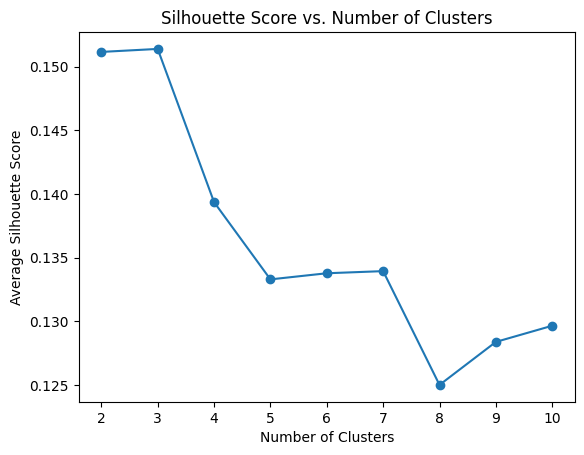

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Initialize a range of cluster numbers
cluster_range = range(2, 11)  # Adjust as needed

# Initialize lists to store silhouette scores
silhouette_scores = []

# Loop over different numbers of clusters
for n_clusters in cluster_range:
    # Fit KMeans clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Compute silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Compute silhouette values for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)

    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots()
    fig.set_size_inches(7, 4)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax1.set_title("Silhouette Plot for {} Clusters".format(n_clusters))
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xticks(cluster_range)
plt.show()


In [ ]:
train.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_label,credit_risk_label,foreign_worker_label
0,1,2.890372,4,2,6.955593,1,2,4,2,1,...,1,1,3,2,1,2,1,Student,Good,no
1,1,2.197225,4,0,7.937017,1,3,2,3,1,...,1,2,3,1,1,2,1,Adult,Good,no
2,2,2.484907,2,9,6.734592,2,4,2,2,1,...,1,1,2,2,1,2,1,Student,Good,no
3,1,2.484907,4,0,7.660114,1,3,3,3,1,...,1,2,2,1,1,1,1,Adult,Good,yes
4,1,2.302585,4,0,7.714677,1,2,1,3,1,...,1,2,2,1,1,1,1,Adult,Good,yes


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   800 non-null    int64   
 1   duration                 800 non-null    float64 
 2   credit_history           800 non-null    int64   
 3   purpose                  800 non-null    int64   
 4   amount                   800 non-null    float64 
 5   savings                  800 non-null    int64   
 6   employment_duration      800 non-null    int64   
 7   installment_rate         800 non-null    int64   
 8   personal_status_sex      800 non-null    int64   
 9   other_debtors            800 non-null    int64   
 10  present_residence        800 non-null    int64   
 11  property                 800 non-null    int64   
 12  age                      800 non-null    float64 
 13  other_installment_plans  800 non-null    int64   
 14  housing   

Modification for test set

In [ ]:
test.shape

(200, 22)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [ ]:
test.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,4,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,3,23,3,1,2,2,2,1,2,1
2,18,2,36,4,3,2337,1,5,4,3,...,1,36,3,2,1,3,2,1,2,1
3,20,1,6,4,0,3676,1,3,1,3,...,1,37,3,1,3,3,1,1,2,1
4,22,2,36,2,5,2384,1,2,4,3,...,4,33,3,1,1,2,2,1,2,1


In [ ]:
test.drop(['Id'],inplace=True,axis=1)

In [ ]:
test.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
1,1,18,2,3,1936,5,4,2,4,1,...,3,23,3,1,2,2,2,1,2,1
2,2,36,4,3,2337,1,5,4,3,1,...,1,36,3,2,1,3,2,1,2,1
3,1,6,4,0,3676,1,3,1,3,1,...,1,37,3,1,3,3,1,1,2,1
4,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,1


In [ ]:
test_copy=test.copy()
interval=(18,25,35,60,100)
categories= ['Student','Young','Adult','Senior']
test_copy['age_label']=pd.cut(test_copy.age,interval,labels=categories)
test_copy.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_label
0,1,12,4,0,2171,1,3,4,3,1,...,38,1,2,2,2,2,1,1,1,Adult
1,1,18,2,3,1936,5,4,2,4,1,...,23,3,1,2,2,2,1,2,1,Student
2,2,36,4,3,2337,1,5,4,3,1,...,36,3,2,1,3,2,1,2,1,Adult
3,1,6,4,0,3676,1,3,1,3,1,...,37,3,1,3,3,1,1,2,1,Adult
4,2,36,2,5,2384,1,2,4,3,1,...,33,3,1,1,2,2,1,2,1,Young


In [ ]:
test_copy['amount']=round(np.log(test_copy['amount']),2)
test_copy['duration']=round(np.log(test_copy['duration']),2)


In [ ]:
test_copy['age']=round(np.log(test_copy['age']),2)

Converting 'good'/'bad' to binary

In [ ]:
test_copy['credit_risk'] = test_copy['credit_risk'].map({'good': 1, 'bad': 0})

In [ ]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   200 non-null    int64   
 1   duration                 200 non-null    float64 
 2   credit_history           200 non-null    int64   
 3   purpose                  200 non-null    int64   
 4   amount                   200 non-null    float64 
 5   savings                  200 non-null    int64   
 6   employment_duration      200 non-null    int64   
 7   installment_rate         200 non-null    int64   
 8   personal_status_sex      200 non-null    int64   
 9   other_debtors            200 non-null    int64   
 10  present_residence        200 non-null    int64   
 11  property                 200 non-null    int64   
 12  age                      200 non-null    float64 
 13  other_installment_plans  200 non-null    int64   
 14  housing   

**Advanced Analysis**

In [ ]:
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold,RepeatedStratifiedKFold

In [ ]:
train_copy=train.copy()

In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   800 non-null    int64   
 1   duration                 800 non-null    float64 
 2   credit_history           800 non-null    int64   
 3   purpose                  800 non-null    int64   
 4   amount                   800 non-null    float64 
 5   savings                  800 non-null    int64   
 6   employment_duration      800 non-null    int64   
 7   installment_rate         800 non-null    int64   
 8   personal_status_sex      800 non-null    int64   
 9   other_debtors            800 non-null    int64   
 10  present_residence        800 non-null    int64   
 11  property                 800 non-null    int64   
 12  age                      800 non-null    float64 
 13  other_installment_plans  800 non-null    int64   
 14  housing   

In [ ]:
train_copy['age']=round(np.log(train_copy['age']),2)
train_copy['amount']=round(np.log(train_copy['amount']),2)
train_copy['duration']=round(np.log(train_copy['duration']),2)
train_copy.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,age_label,credit_risk_label
795,1,1.06,4,0,2.11,1,5,1,2,1,...,1,1,3,3,2,2,2,0,Young,Bad
796,1,0.91,0,3,2.17,1,3,4,3,1,...,3,1,2,3,2,2,2,0,Young,Bad
797,4,1.11,4,0,2.25,5,5,4,3,1,...,3,3,1,4,2,2,2,0,Young,Bad
798,2,0.91,2,3,2.17,5,1,2,3,1,...,3,2,1,4,2,2,2,0,Adult,Bad
799,1,1.22,2,2,2.17,5,5,4,3,1,...,3,2,1,3,2,1,2,0,Young,Bad


In [ ]:
# Assuming train_copy is your DataFrame
train_copy = train_copy.drop(['credit_risk_label', 'age_label'], axis=1)


In [ ]:
x_full=train_copy.drop('credit_risk',axis=1)
y_full=train_copy['credit_risk']

In [ ]:
x_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   800 non-null    int64  
 1   duration                 800 non-null    float64
 2   credit_history           800 non-null    int64  
 3   purpose                  800 non-null    int64  
 4   amount                   800 non-null    float64
 5   savings                  800 non-null    int64  
 6   employment_duration      800 non-null    int64  
 7   installment_rate         800 non-null    int64  
 8   personal_status_sex      800 non-null    int64  
 9   other_debtors            800 non-null    int64  
 10  present_residence        800 non-null    int64  
 11  property                 800 non-null    int64  
 12  age                      800 non-null    float64
 13  other_installment_plans  800 non-null    int64  
 14  housing                  8

In [ ]:
y_full.info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    float64
 13  other_installment_plans  640 non-null    int64  
 14  housing                  640 

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 640 entries, 264 to 102
Series name: credit_risk
Non-Null Count  Dtype
--------------  -----
640 non-null    int64
dtypes: int64(1)
memory usage: 10.0 KB


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 696 to 670
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   160 non-null    int64  
 1   duration                 160 non-null    float64
 2   credit_history           160 non-null    int64  
 3   purpose                  160 non-null    int64  
 4   amount                   160 non-null    float64
 5   savings                  160 non-null    int64  
 6   employment_duration      160 non-null    int64  
 7   installment_rate         160 non-null    int64  
 8   personal_status_sex      160 non-null    int64  
 9   other_debtors            160 non-null    int64  
 10  present_residence        160 non-null    int64  
 11  property                 160 non-null    int64  
 12  age                      160 non-null    float64
 13  other_installment_plans  160 non-null    int64  
 14  housing                  160 

In [ ]:
import warnings
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pandas as pd

def cross_validate(X = x_train,y = y_train):

    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')


In [ ]:
cross_validate(x_train,y_train)

Model:RF,Mean: 0.7713541666666667,Std Dev: 0.03664017153533658
Model:GB,Mean: 0.7729166666666667,Std Dev: 0.04665457432616393
Model:SVC,Mean: 0.7755208333333333,Std Dev: 0.031115160481758008
Model:SGD,Mean: 0.7140625,Std Dev: 0.1102014904145281
Model:LogReg,Mean: 0.7697916666666667,Std Dev: 0.043062555434571645
Model:AdaBoost,Mean: 0.765625,Std Dev: 0.04824390073712254
Model:Bag,Mean: 0.7385416666666667,Std Dev: 0.05149669622628448
Model:xgboost,Mean: 0.7734375,Std Dev: 0.049038608832735045
Model:Dtree,Mean: 0.7104166666666667,Std Dev: 0.038428889053534816


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    float64
 13  other_installment_plans  640 non-null    int64  
 14  housing                  640 

Balancing the data by Oversampling using ADASYN Library

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 264 to 102
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   640 non-null    int64  
 1   duration                 640 non-null    float64
 2   credit_history           640 non-null    int64  
 3   purpose                  640 non-null    int64  
 4   amount                   640 non-null    float64
 5   savings                  640 non-null    int64  
 6   employment_duration      640 non-null    int64  
 7   installment_rate         640 non-null    int64  
 8   personal_status_sex      640 non-null    int64  
 9   other_debtors            640 non-null    int64  
 10  present_residence        640 non-null    int64  
 11  property                 640 non-null    int64  
 12  age                      640 non-null    float64
 13  other_installment_plans  640 non-null    int64  
 14  housing                  640 

In [ ]:
x_train.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

In [ ]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(x_train,y_train)
Counter(y_res)

Counter({1: 485, 0: 456})

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [ ]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8473161627472936,Std Dev: 0.03576695260914917
Model:GB,Mean: 0.8090630832400147,Std Dev: 0.033149696873648084
Model:SVC,Mean: 0.7846584546472564,Std Dev: 0.03768676545386011
Model:SGD,Mean: 0.7056215005599104,Std Dev: 0.05979918298743192
Model:LogReg,Mean: 0.7573833519970138,Std Dev: 0.0418547790205647
Model:AdaBoost,Mean: 0.7672340425531915,Std Dev: 0.03855287515743676
Model:Bag,Mean: 0.8062747293766329,Std Dev: 0.041292705173494516
Model:xgboost,Mean: 0.8303247480403133,Std Dev: 0.028176086598197397
[LightGBM] [Info] Number of positive: 436, number of negative: 410
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 840
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515366 ->

Let's search for the best parameters in our best model Random Forest

In [ ]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),

    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ca5afcc1090>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ca5afcc1240>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ca5afcc1660>},
                   random_state=42, scoring='accuracy')

In [ ]:
best_params_rf=rnd_search.best_params_
print('Best parameters of Random Forest model:',best_params_rf)

Best parameters of Random Forest model: {'max_depth': 8, 'max_features': 5, 'n_estimators': 103}


Let's search for the best parameters in our next best model-XGboost

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid=[{'booster': ['gbtree', 'dart'],
                          'learning_rate': [0.3, 0.5, 0.01, 0.1],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
best_params_xgb=grid_search.best_params_
print('Best Parameters for XGBoost model:',best_params_xgb)

Best Parameters for XGBoost model: {'booster': 'gbtree', 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 30}


Best parameter search for Gradient Boost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}

# Initialize the Gradient Boosting Classifier with default parameters
gb_clf = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(gb_clf, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the data to perform the search
grid_search_gb.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [ ]:
best_params_gb=grid_search_gb.best_params_
print('Best Parameters for Gradient Boost model:',best_params_gb)

Best Parameters for Gradient Boost model: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}


Best Parameter search for log regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize the Logistic Regression model with default parameters
lr_clf = LogisticRegression(random_state=42)

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(lr_clf, param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Fit the data to perform the search
grid_search_lr.fit(X_res, y_res)

# Print the best parameters for Logistic Regression
best_params_lr = grid_search_lr.best_params_
print('Best Parameters for Logistic Regression:', best_params_lr)


Best Parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}


Best Parameters for Bagging

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# Define the parameter grid for Bagging Classifier
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Initialize the Bagging Classifier model with default parameters
bagging_clf = BaggingClassifier(random_state=42)

# Initialize GridSearchCV for Bagging Classifier
grid_search_bagging = GridSearchCV(bagging_clf, param_grid=param_grid_bagging, cv=5, scoring='accuracy')

# Fit the data to perform the search
grid_search_bagging.fit(X_res, y_res)

# Print the best parameters for Bagging Classifier
best_params_bagging = grid_search_bagging.best_params_
print('Best Parameters for Bagging Classifier:', best_params_bagging)


Best Parameters for Bagging Classifier: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}


Best parameters for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model with default parameters
svm_clf = SVC(random_state=42)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_clf, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit the data to perform the search
grid_search_svm.fit(X_res, y_res)

# Print the best parameters for SVM
best_params_svm = grid_search_svm.best_params_
print('Best Parameters for SVM:', best_params_svm)


Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


New accuracy with best parameters-Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Best parameters obtained from your search
best_params_rf = {'n_estimators': 131, 'max_depth': 8, 'max_features': 8}

# Initialize the Random Forest Classifier with the best parameters
rf_clf_best = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the classifier on the training data
rf_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_rf = rf_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_rf = accuracy_score(y_res, y_pred_train_rf)
print("Accuracy on training data (Random Forest):", accuracy_train_rf)


Accuracy on training data (Random Forest): 0.9553666312433581


New accuracy with best parameters -XGBoost

In [ ]:
# Initialize the XGBoost Classifier with the best parameters
xgb_clf_best = XGBClassifier(**best_params_xgb, random_state=42)

# Fit the classifier on the training data
xgb_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_xgb = xgb_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_xgb = accuracy_score(y_res, y_pred_train_xgb)
print("Accuracy on training data (XGBoost):", accuracy_train_xgb)


Accuracy on training data (XGBoost): 1.0


New Accuracy with best parameters-Gradient Boost

In [ ]:
# Initialize the Gradient Boosting Classifier with the best parameters
gb_clf_best = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Fit the classifier on the training data
gb_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train = gb_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_res, y_pred_train)
print("Accuracy on training data:", accuracy_train)


Accuracy on training data: 0.9946865037194474


New Accuracy with best parameters-Logistic Regression

In [ ]:
# Initialize the Logistic Regression Classifier with the best parameters
lr_clf_best = LogisticRegression(**best_params_lr, random_state=42)

# Fit the classifier on the training data
lr_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_lr = lr_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_lr = accuracy_score(y_res, y_pred_train_lr)
print("Accuracy on training data (Logistic Regression):", accuracy_train_lr)


Accuracy on training data (Logistic Regression): 0.7683315621679064


New Accuracy with best parameters-Bagging

In [ ]:
# Initialize the Bagging Classifier with the best parameters
bagging_clf_best = BaggingClassifier(**best_params_bagging, random_state=42)

# Fit the classifier on the training data
bagging_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_bagging = bagging_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_bagging = accuracy_score(y_res, y_pred_train_bagging)
print("Accuracy on training data (Bagging Classifier):", accuracy_train_bagging)


Accuracy on training data (Bagging Classifier): 1.0


New Accuracy with best parameters-SVM

In [ ]:
# Initialize the SVM Classifier with the best parameters
svm_clf_best = SVC(**best_params_svm, random_state=42)

# Fit the classifier on the training data
svm_clf_best.fit(X_res, y_res)

# Predict on the training data
y_pred_train_svm = svm_clf_best.predict(X_res)

# Calculate accuracy on the training data
accuracy_train_svm = accuracy_score(y_res, y_pred_train_svm)
print("Accuracy on training data (SVM):", accuracy_train_svm)


Accuracy on training data (SVM): 0.9649309245483528


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize and fit Random Forest Classifier
rf_clf = RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386, random_state=42)
rf_clf.fit(X_res, y_res)

# Initialize and fit Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_res, y_res)

# Initialize and fit XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=30, max_depth=8, learning_rate=0.3, booster='gbtree', random_state=42)
xgb_clf.fit(X_res, y_res)

# Initialize and fit Logistic Regression Classifier
log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_res, y_res)

# Initialize and fit Bagging Classifier
bagging_clf = BaggingClassifier()
bagging_clf.fit(X_res, y_res)

# Initialize and fit Support Vector Machine (SVM) Classifier
svm_clf = SVC()
svm_clf.fit(X_res, y_res)


SVC()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
predictions_xgb_test = xgb_clf.predict(x_test)

# Calculate accuracy on the test data
accuracy_xgb_test = accuracy_score(y_test, predictions_xgb_test)

# Print the accuracy score
print('Accuracy on test set (XGBoost): {:.4f}'.format(accuracy_xgb_test))


Accuracy on test set (XGBoost): 0.7562


In [ ]:
predictions_train_xgb = xgb_clf.predict(x_test)
predictions_train_rf = rf_clf.predict(x_test)
predictions_train_gb = gb_clf.predict(x_test)
lr_clf.fit(X_res, y_res)
predictions_train_lr = lr_clf.predict(x_test)
predictions_train_bagging = bagging_clf.predict(x_test)
predictions_train_svm = svm_clf.predict(x_test)
#from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))
print('Accuracy LogRegression...{}'.format(accuracy_score(y_test,predictions_train_lr)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_train_bagging)))
print('Accuracy SVM...{}'.format(accuracy_score(y_test,predictions_train_svm)))

Accuracy XGBoost...0.75625
Accuracy RForest...0.725
Accuracy GBoost...0.76875
Accuracy LogRegression...0.7
Accuracy Bagging...0.7
Accuracy SVM...0.73125


In [ ]:
predictions_xgb = xgb_clf.predict(x_test)

# Compute accuracy
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print('Accuracy XGBoost: {:.4f}'.format(accuracy_xgb))

Accuracy XGBoost: 0.7562


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
#print('SupportVector_Confusion Matrix')
#print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('LogRegression_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_lr))
print('SVM_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svm))

XGBoost_Confusion Matrix
[[24 21]
 [18 97]]
RandomForest_Confusion Matrix
[[28 17]
 [27 88]]
GradientBoosting_Confusion Matrix
[[29 16]
 [21 94]]
Bagging_Confusion Matrix
[[29 16]
 [21 94]]
LogRegression_Confusion Matrix
[[26 19]
 [29 86]]
SVM_Confusion Matrix
[[26 19]
 [24 91]]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Make predictions on the test set for all models
predictions_test_rf = rf_clf.predict(x_test)
predictions_test_gb = gb_clf.predict(x_test)
predictions_test_lr = lr_clf.predict(x_test)
predictions_test_bagging = bagging_clf.predict(x_test)
predictions_test_svm = svm_clf.predict(x_test)
predictions_test_xgb = xgb_clf.predict(x_test)

# Make predictions on the train set for all models
predictions_train_rf = rf_clf.predict(X_res)
predictions_train_gb = gb_clf.predict(X_res)
predictions_train_lr = lr_clf.predict(X_res)
predictions_train_bagging = bagging_clf.predict(X_res)
predictions_train_svm = svm_clf.predict(X_res)
predictions_train_xgb = xgb_clf.predict(X_res)

# Calculate RMSE for test set for all models
rmse_test_rf = calculate_rmse(y_test, predictions_test_rf)
rmse_test_gb = calculate_rmse(y_test, predictions_test_gb)
rmse_test_lr = calculate_rmse(y_test, predictions_test_lr)
rmse_test_bagging = calculate_rmse(y_test, predictions_test_bagging)
rmse_test_svm = calculate_rmse(y_test, predictions_test_svm)
rmse_test_xgb = calculate_rmse(y_test, predictions_test_xgb)

# Calculate RMSE for train set for all models
rmse_train_rf = calculate_rmse(y_res, predictions_train_rf)
rmse_train_gb = calculate_rmse(y_res, predictions_train_gb)
rmse_train_lr = calculate_rmse(y_res, predictions_train_lr)
rmse_train_bagging = calculate_rmse(y_res, predictions_train_bagging)
rmse_train_svm = calculate_rmse(y_res, predictions_train_svm)
rmse_train_xgb = calculate_rmse(y_res, predictions_train_xgb)

# Print RMSE for all models
print("RMSE for Random Forest (Test):", rmse_test_rf)
print("RMSE for Gradient Boosting (Test):", rmse_test_gb)
print("RMSE for Logistic Regression (Test):", rmse_test_lr)
print("RMSE for Bagging (Test):", rmse_test_bagging)
print("RMSE for SVM (Test):", rmse_test_svm)
print("RMSE for XGBoost (Test):", rmse_test_xgb)

print("RMSE for Random Forest (Train):", rmse_train_rf)
print("RMSE for Gradient Boosting (Train):", rmse_train_gb)
print("RMSE for Logistic Regression (Train):", rmse_train_lr)
print("RMSE for Bagging (Train):", rmse_train_bagging)
print("RMSE for SVM (Train):", rmse_train_svm)
print("RMSE for XGBoost (Train):", rmse_train_xgb)


RMSE for Random Forest (Test): 0.5244044240850758
RMSE for Gradient Boosting (Test): 0.48088460154178364
RMSE for Logistic Regression (Test): 0.5477225575051661
RMSE for Bagging (Test): 0.5477225575051661
RMSE for SVM (Test): 0.518411033833193
RMSE for XGBoost (Test): 0.49371044145328746
RMSE for Random Forest (Train): 0.23051022277878705
RMSE for Gradient Boosting (Train): 0.27661226733454447
RMSE for Logistic Regression (Train): 0.47799617159948254
RMSE for Bagging (Train): 0.09220408911151481
RMSE for SVM (Train): 0.40058405818590515
RMSE for XGBoost (Train): 0.03259906833194042


In [ ]:
from tabulate import tabulate

# Define the data for the table
data = [
    ["Random Forest", rmse_test_rf, rmse_train_rf],
    ["Gradient Boosting", rmse_test_gb, rmse_train_gb],
    ["Logistic Regression", rmse_test_lr, rmse_train_lr],
    ["Bagging", rmse_test_bagging, rmse_train_bagging],
    ["SVM", rmse_test_svm, rmse_train_svm],
    ["XGBoost", rmse_test_xgb, rmse_train_xgb]
]

# Define the headers for the table
headers = ["Model", "Test RMSE", "Train RMSE"]

# Print the table
print(tabulate(data, headers=headers))


Model                  Test RMSE    Train RMSE
-------------------  -----------  ------------
Random Forest           0.524404     0.23051
Gradient Boosting       0.480885     0.276612
Logistic Regression     0.547723     0.477996
Bagging                 0.547723     0.0922041
SVM                     0.518411     0.400584
XGBoost                 0.49371      0.0325991


In [ ]:
train1_copy=train.copy()

In [ ]:
train1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   800 non-null    int64  
 1   duration                 800 non-null    float64
 2   credit_history           800 non-null    int64  
 3   purpose                  800 non-null    int64  
 4   amount                   800 non-null    float64
 5   savings                  800 non-null    int64  
 6   employment_duration      800 non-null    int64  
 7   installment_rate         800 non-null    int64  
 8   personal_status_sex      800 non-null    int64  
 9   other_debtors            800 non-null    int64  
 10  present_residence        800 non-null    int64  
 11  property                 800 non-null    int64  
 12  age                      800 non-null    int64  
 13  other_installment_plans  800 non-null    int64  
 14  housing                  8

In [ ]:
age_mapping = {'Student': 0, 'Young': 1, 'Adult': 2, 'Senior': 3}

# Replace categorical values with numerical values
train1_copy['age'] = train1_copy['age'].replace(age_mapping)
train1_copy['age'] = train1_copy['age'].astype(int)

In [ ]:
#train1_copy.drop(columns=['credit_risk_label'],inplace=True,axis=1)
train1_copy.drop(columns=['foreign_worker_label'],inplace=True,axis=1)
#train.drop(['Id'],inplace=True,axis=1)

--------------------------------------------------------------------------
checking clusters

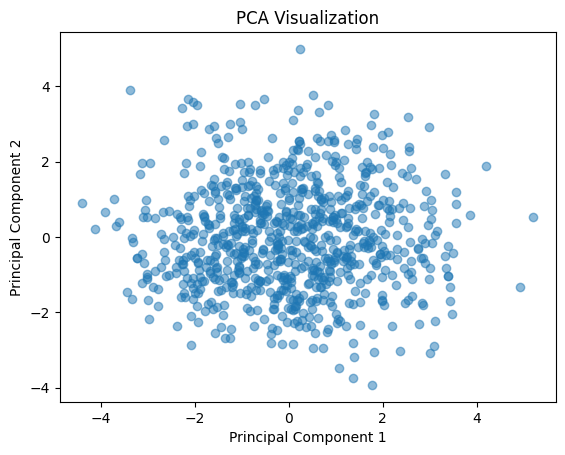

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset into a DataFrame
# Assuming your dataset is stored in a DataFrame named 'data'

# Perform any necessary data preprocessing
# For example, you might need to handle missing values, encode categorical variables, etc.

# Select relevant features for clustering
X = train1_copy.drop(columns=['credit_risk'])  # Exclude the target column if present

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()



Factor Analysis

In [ ]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Load your dataset into a DataFrame
# Assuming your dataset is stored in a DataFrame named 'data'

# Perform any necessary data preprocessing
# For example, handle missing values, encode categorical variables, etc.

# Select relevant features for factor analysis
X = train1_copy.drop(columns=['credit_risk'])  # Exclude the target column if present

# Standardize the features (important for factor analysis)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize FactorAnalysis with the desired number of components
n_components = 3  # You can adjust the number of components as needed
fa = FactorAnalysis(n_components=n_components)

# Fit FactorAnalysis to the standardized data
fa.fit(X_scaled)

# Get the factor loadings (coefficients)
factor_loadings = pd.DataFrame(fa.components_, columns=X.columns)

# Get the transformed data (factors)
factors = pd.DataFrame(fa.transform(X_scaled), columns=[f'Factor_{i+1}' for i in range(n_components)])
print("Factor Loadings:")
print(factor_loadings)
print("\nTransformed Data (Factors):")
print(factors)


Factor Loadings:
     status  duration  credit_history   purpose    amount   savings  \
0  0.028989 -0.672248        0.040251 -0.036375 -0.955549 -0.070316   
1 -0.092703 -0.321643       -0.145677 -0.108981  0.062115 -0.093714   
2  0.212537 -0.300388        0.445976 -0.087981  0.032665  0.099835   

   employment_duration  installment_rate  personal_status_sex  other_debtors  \
0             0.010084          0.274521             0.020235       0.034663   
1            -0.349677         -0.614168            -0.125058       0.109287   
2             0.259040         -0.265463             0.068609      -0.054877   

   present_residence  property       age  other_installment_plans   housing  \
0          -0.038148 -0.371674 -0.020793                 0.019322 -0.155897   
1          -0.231156 -0.333858 -0.324192                 0.073316 -0.332747   
2           0.196354 -0.009541  0.460458                 0.079691  0.153627   

   number_credits       job  people_liable  telephone  forei